<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/deeplearning/sub_clasases_codes/%EA%B7%B8%EB%AC%BC_class_2%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir = '/content/drive/MyDrive/tree_test/'

In [5]:
name = os.listdir(dir)
name

['잎을 무성하게 그린',
 '잎을 안 무성하게 그린',
 '잎이 없는',
 '잎이 큰',
 '잎이 안 큰',
 '윗쪽으로 뻗는',
 '윗쪽으로 안 뻗는',
 '열매있음',
 '열매없음',
 '그물 아닌',
 '꽃없음',
 '그물',
 '꽃있음']

In [6]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '그물'))
_2.append(os.listdir(dir +'그물 아닌'))
# _3.append(os.listdir(dir + '잎이 안 큰'))
# _4.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# _5.append(os.listdir(dir + '잎을 무성하게 그린'))
# _6.append(os.listdir(dir + '잎을 안 무성하게 그린'))

In [7]:
total_list = []
total_list.append(os.listdir(dir + '그물'))
total_list.append(os.listdir(dir +'그물 아닌'))
# total_list.append(os.listdir(dir + '잎이 안 큰'))
# total_list.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# total_list.append(os.listdir(dir + '잎을 무성하게 그린'))
# total_list.append(os.listdir(dir + '잎을 안 무성하게 그린'))
# x = set(total_list)
print(total_list)

[['잎31.png', '잎28.png', '잎42.png', '잎47.png', '잎48.png', '잎72.png', '잎64.png', '잎77.png', '잎94.png', '잎92.png', '잎98.png', '잎119.png', '잎132.png', '잎149.png', '잎197.png', '잎196.png', '잎202.png', '잎236.png', '잎271.png', '잎282.png', '잎315.png', '잎297.png', '잎321.png', '잎331.png', '잎337.png', '잎340.png', '잎447.png', '잎448.png', '잎453.png', '잎452.png', '잎455.png', '잎454.png', '잎457.png', '잎458.png', '잎461.png', '잎462.png', '잎459.png', '잎465.png', '잎463.png', '잎464.png', '전체824.png'], ['잎5.png', '잎3.png', '잎6.png', '잎4.png', '잎1.png', '잎9.png', '잎22.png', '잎13.png', '잎12.png', '잎14.png', '잎41.png', '잎43.png', '잎67.png', '잎62.png', '잎74.png', '잎84.png', '잎82.png', '잎97.png', '잎96.png', '잎99.png', '잎116.png', '잎118.png', '잎190.png', '잎201.png', '잎206.png', '잎467.png', '잎466.png', '잎471.png', '잎469.png', '잎470.png', '잎476.png', '잎478.png', '잎481.p

In [8]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['잎31.png', '잎28.png', '잎42.png', '잎47.png', '잎48.png', '잎72.png', '잎64.png', '잎77.png', '잎94.png', '잎92.png', '잎98.png', '잎119.png', '잎132.png', '잎149.png', '잎197.png', '잎196.png', '잎202.png', '잎236.png', '잎271.png', '잎282.png', '잎315.png', '잎297.png', '잎321.png', '잎331.png', '잎337.png', '잎340.png', '잎447.png', '잎448.png', '잎453.png', '잎452.png', '잎455.png', '잎454.png', '잎457.png', '잎458.png', '잎461.png', '잎462.png', '잎459.png', '잎465.png', '잎463.png', '잎464.png', '전체824.png', '잎5.png', '잎3.png', '잎6.png', '잎4.png', '잎1.png', '잎9.png', '잎22.png', '잎13.png', '잎12.png', '잎14.png', '잎41.png', '잎43.png', '잎67.png', '잎62.png', '잎74.png', '잎84.png', '잎82.png', '잎97.png', '잎96.png', '잎99.png', '잎116.png', '잎118.png', '잎190.png', '잎201.png', '잎206.png', '잎467.png', '잎466.png', '잎471.png', '잎469.png', '잎470.png', '잎476.png', '잎478.png', '잎481.png'

In [9]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
# _3 = np.concatenate(_3).tolist()
# _4 = np.concatenate(_4).tolist()
# _5 = np.concatenate(_5).tolist()
# _6 = np.concatenate(_6).tolist()

In [10]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [11]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
# df3 = pd.DataFrame({
#     '_3' : _3
# })
# df4 = pd.DataFrame({
#     '_4' : _4
# })
# df5 = pd.DataFrame({
#     '_5' : _5
# })
# df6 = pd.DataFrame({
#     '_6' : _6
# })

In [12]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
# result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
# result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
# result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')
# result = pd.merge(result,df6, how='left', left_on='imgs', right_on='_6')

In [13]:
result = result.fillna(0)

In [14]:
result

,imgs,_1,_2
0,잎31.png,잎31.png,0
1,잎28.png,잎28.png,0
2,잎42.png,잎42.png,0
3,잎47.png,잎47.png,0
4,잎48.png,잎48.png,0
...,...,...,...
82,전체606.png,0,전체606.png
83,전체614.png,0,전체614.png
84,전체618.png,0,전체618.png
85,전체636.png,0,전체636.png


In [15]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)
# result['_4'] = result['_4'].apply(binary)
# result['_5'] = result['_5'].apply(binary)
# result['_6'] = result['_6'].apply(binary)

In [16]:
result

,imgs,_1,_2
0,잎31.png,1,0
1,잎28.png,1,0
2,잎42.png,1,0
3,잎47.png,1,0
4,잎48.png,1,0
...,...,...,...
82,전체606.png,0,1
83,전체614.png,0,1
84,전체618.png,0,1
85,전체636.png,0,1


In [17]:
result.columns = ['imgs','그물', '그물 아닌']

In [18]:
result1 = result.copy()

In [ ]:
# def chage(data):
#     if data == 1:
#         data = 0
#         return data
#     else:
#         data = 1
#         return data
# result1['잎을 무성하게 그린'] = result1['잎을 무성하게 그린'].apply(chage)

# result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)

In [ ]:
# def chage2(data):
#     if data == 1:
#         data = 2
#         return data
#     else:
#         data = 0
#         return data
# result['잎을 안 무성하게 그린'] = result['잎을 안 무성하게 그린'].apply(chage2)

In [ ]:
result1.iloc[101:120]

,imgs,윗쪽으로 안 뻗는,윗쪽으로 뻗는


In [19]:
data_1 = result1[['imgs','그물']]
data_1.columns = ['imgs','잎']

In [20]:
data_1

,imgs,잎
0,잎31.png,1
1,잎28.png,1
2,잎42.png,1
3,잎47.png,1
4,잎48.png,1
...,...,...
82,전체606.png,0
83,전체614.png,0
84,전체618.png,0
85,전체636.png,0


In [21]:
data_1['잎'].value_counts()

0    46
1    41
Name: 잎, dtype: int64

In [22]:
import sklearn
data_merge2_shuffled = sklearn.utils.shuffle(data_1)

In [23]:
data_merge2_shuffled

,imgs,잎
75,잎480.png,0
55,잎74.png,0
13,잎149.png,1
61,잎116.png,0
49,잎12.png,0
...,...,...
40,전체824.png,1
74,잎479.png,0
73,잎481.png,0
70,잎470.png,0


In [24]:
data = data_merge2_shuffled

In [25]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=1, stratify=data['잎'])

In [26]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 69
Test  set rows: 18


In [27]:
IMAGE_PATH = '/content/drive/MyDrive/total/'

In [28]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [29]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['imgs'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['잎'], drop_first=False)
    return X, y

In [30]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [31]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69, 300, 300, 3)
(69, 2)
(18, 300, 300, 3)
(18, 2)


In [32]:
#하이퍼 파라미터 생성
BATCH_SIZE = 7 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

In [33]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.1 MB/s eta 0:00:00


In [34]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

In [35]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

50086816/50086816 [==============================] - 4s 0us/step


In [36]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(2, activation='softmax')(base_model.layers[-2].output)

In [37]:
# model = Model(inputs=base_model.input, outputs=net)


model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(300,300,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 32)       0

In [38]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 32)       0

In [40]:
%mkdir /content/drive/MyDrive/models/
%mkdir /content/drive/MyDrive/models/그물/
%mkdir /content/drive/MyDrive/models/그물/check_point
checkpoint_path = "/content/drive/MyDrive/models/그물/check_point/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

mkdir: cannot create directory ‘/content/drive/MyDrive/models/’: File exists


In [41]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=30)
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=7*10)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=6,
    verbose=VERBOSE,
    validation_split=0.2,
    callbacks=[early_stopping, cp_callback]
)

Epoch 1/200
10/10 [==============================] - 14s 65ms/step - loss: 2.6505 - accuracy: 0.5636 - val_loss: 5.7147 - val_accuracy: 0.5714
Epoch 2/200
10/10 [==============================] - 0s 15ms/step - loss: 3.5634 - accuracy: 0.6545 - val_loss: 33.9660 - val_accuracy: 0.4286
Epoch 3/200
10/10 [==============================] - 0s 15ms/step - loss: 2.8746 - accuracy: 0.6727 - val_loss: 11.1917 - val_accuracy: 0.5714
Epoch 4/200
10/10 [==============================] - 0s 14ms/step - loss: 5.2539 - accuracy: 0.6364 - val_loss: 42.5420 - val_accuracy: 0.5714
Epoch 5/200
10/10 [==============================] - 0s 14ms/step - loss: 4.4352 - accuracy: 0.5636 - val_loss: 19.6772 - val_accuracy: 0.5714
Epoch 6/200
10/10 [==============================] - 0s 14ms/step - loss: 3.1410 - accuracy: 0.6364 - val_loss: 18.7829 - val_accuracy: 0.5714
Epoch 7/200
 7/10 [====================>.........] - ETA: 0s - loss: 5.6771 - accuracy: 0.6429 
Epoch 7: saving model to /content/drive/MyDriv

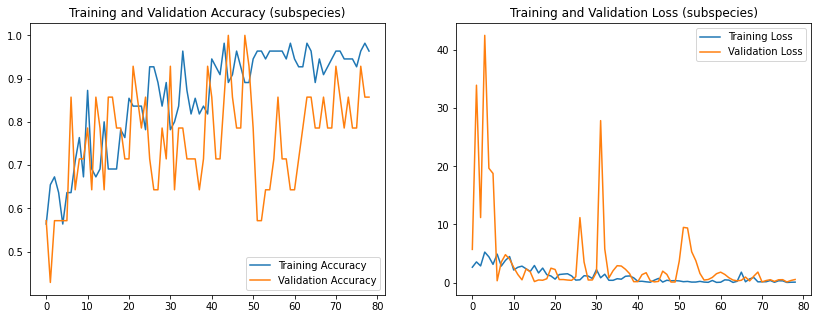

In [42]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [43]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 123ms/step - loss: 0.5739 - accuracy: 0.8889


[0.5739292502403259, 0.8888888955116272]

In [44]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 197ms/step


In [45]:
np.argmax(predictions[2])

0

In [46]:
y_test

,0,1
25,0,1
82,1,0
73,1,0
38,0,1
36,0,1
1,0,1
0,0,1
39,0,1
69,1,0
75,1,0


In [ ]:
%cd /content/drive/MyDrive/models/그물/
from keras.models import load_model
model.save('그물_model.h5')

/content/drive/MyDrive/models/열매
